In [43]:
import pandas as pd

df = pd.read_csv("Open_Payments_Data.csv")

# Display the first few rows of the DataFrame to confirm it loaded correctly

print(df.head())

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_57677/470156845.py:3: DtypeWarning: Columns (4,8,10,12,15,17,18,20,21,22,23,24,26,27,28,32,33,34,35,39,46,47,48,49,51,52,53,54,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Open_Payments_Data.csv")


  Change_Type       Covered_Recipient_Type  Teaching_Hospital_CCN  Teaching_Hospital_ID Teaching_Hospital_Name  ...  Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5  Associated_Drug_or_Biological_NDC_5 Associated_Device_or_Medical_Supply_PDI_5 Program_Year Payment_Publication_Date
0         NEW  Covered Recipient Physician                    NaN                   NaN                    NaN  ...                                                NaN                                         NaN                                       NaN         2023               06/28/2024
1         NEW  Covered Recipient Physician                    NaN                   NaN                    NaN  ...                                                NaN                                         NaN                                       NaN         2023               06/28/2024
2         NEW  Covered Recipient Physician                    NaN                   NaN                    NaN  ...            

In [44]:
# List of columns you want to drop from the DataFrame
columns_to_drop = ['Change_Type','Recipient_Primary_Business_Street_Address_Line1','Recipient_Primary_Business_Street_Address_Line2',
                   'Recipient_Zip_Code','Covered_Recipient_Name_Suffix','Covered_Recipient_NPI','Covered_Recipient_Profile_ID',
    'Teaching_Hospital_CCN', 'Teaching_Hospital_ID', 'Teaching_Hospital_Name'
    , 'Recipient_Postal_Code',
    'Covered_Recipient_Primary_Type_2', 'Covered_Recipient_Primary_Type_3',
    'Covered_Recipient_Primary_Type_4', 'Covered_Recipient_Primary_Type_5',
    'Covered_Recipient_Primary_Type_6', 'Covered_Recipient_Specialty_2',
    'Covered_Recipient_Specialty_3', 'Covered_Recipient_Specialty_4',
    'Covered_Recipient_Specialty_5', 'Covered_Recipient_Specialty_6',
    'Covered_Recipient_License_State_code2', 'Covered_Recipient_License_State_code3',
    'Covered_Recipient_License_State_code4', 'Covered_Recipient_License_State_code5',
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID','City_of_Travel','State_of_Travel', 'Country_of_Travel',
    'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
    'Third_Party_Equals_Covered_Recipient_Indicator','Delay_in_Publication_Indicator',
    'Record_ID','Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',
    'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2','Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
    'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4','Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5',
    'Associated_Drug_or_Biological_NDC_1', 'Associated_Drug_or_Biological_NDC_2',
    'Associated_Drug_or_Biological_NDC_3', 'Associated_Drug_or_Biological_NDC_4',
    'Associated_Drug_or_Biological_NDC_5', 'Associated_Device_or_Medical_Supply_PDI_1',
    'Associated_Device_or_Medical_Supply_PDI_2', 'Associated_Device_or_Medical_Supply_PDI_3',
    'Associated_Device_or_Medical_Supply_PDI_4', 'Associated_Device_or_Medical_Supply_PDI_5',
    'Program_Year','Payment_Publication_Date'
]

# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [45]:
columns_to_check = [
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5'
]

# Check if any of the columns contain the string "Device"
contains_device = df[columns_to_check].apply(lambda x: x.str.contains('Device', na=False)).any(axis=1)

# Count the True values in the series
device_count = contains_device.sum()

# Print the count
print(f"Number of records with 'Device' in any specified column: {device_count}")

Number of records with 'Device' in any specified column: 2993178


In [46]:
# Assuming df is your loaded DataFrame
# List of columns to check for the presence of the string "Device"
columns_to_check = [
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5'
]

# Apply a filter across these columns to retain rows where any column contains "Device"
filtered_df = df[
    df[columns_to_check].apply(lambda x: x.str.contains('Device', na=False)).any(axis=1)
]
pd.set_option('display.width', 1000)  # Adjust the width as needed
pd.set_option('display.max_columns', 10)  # Set max columns to display in a row
# Now filtered_df will only contain rows where at least one of the specified columns has "Device"
print(filtered_df)

                       Covered_Recipient_Type Covered_Recipient_First_Name Covered_Recipient_Middle_Name Covered_Recipient_Last_Name Recipient_City  ... Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4 Product_Category_or_Therapeutic_Area_4 Covered_or_Noncovered_Indicator_5 Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5 Product_Category_or_Therapeutic_Area_5
0                 Covered Recipient Physician                           SY                             Q                          LE         IRVING  ...                                             Device                       Tissue Resection Device                               NaN                                                NaN                                           NaN
1                 Covered Recipient Physician                        JAMES                             G                        BASS        ABILENE  ...                                             Device                       Tissue Resec

In [47]:
# Count unique values and their occurrence in each column
submitter_counts = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].value_counts()
payer_counts = filtered_df['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'].value_counts()

# Print the counts
print("Counts of unique submitters:")
print(submitter_counts)
print("\nCounts of unique payers:")
print(payer_counts)

Counts of unique submitters:
Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name
Abbott Laboratories                                                     311003
Medtronic, Inc.                                                         303123
Boston Scientific Corporation                                           227540
Stryker Corporation                                                     139743
Intuitive Surgical, Inc.                                                102492
                                                                         ...  
Teleflex Medical Brasil Servicos E Comercio De Produtos Medicos Ltda         1
Ziemek Dental Laboratory, Inc.                                               1
Peter Brasseler Holdings, LLC                                                1
CELTIC BIODEVICES LLC                                                        1
ELEKTA AB (publ)                                                             1
Name: count, Length: 801, dtype: int64

Coun

In [48]:
# Filter the DataFrame for names starting with 'A'
mask = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].str.startswith('3')

# Extract the names from the column that match the filter and find unique entries
unique_names_starting_with_a = filtered_df.loc[mask, 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].unique()

# Display the unique filtered names
print(unique_names_starting_with_a)

['3Shape Inc' '3Shape A/S' '3M Company']


In [49]:
# Define replacements in a dictionary
replacements = {
    'Alcon Vision LLC': 'Alcon Inc.',
    'Alcon Puerto Rico Inc': 'Alcon Inc.',
    'Alcon Research LLC': 'Alcon Inc.'
}

# Replace values in the DataFrame
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(replacements)

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_57677/3274020282.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(replacements)


In [50]:
# Define the column name for clarity and maintainability
column_name = 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'

# List of Olympus-related names to be replaced
olympus_variants = [
    'Olympus Winter & Ibe GmbH', 'Olympus Latin America, Inc.',
    'Olympus Medical Systems Corporation', 'Olympus Corporation',
    'Olympus America Inc.', 'Olympus Corporation of the Americas'
]

# Replace these names with 'Olympus' in the DataFrame
filtered_df[column_name] = filtered_df[column_name].replace(olympus_variants, 'Olympus')

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_57677/2717218494.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[column_name] = filtered_df[column_name].replace(olympus_variants, 'Olympus')


In [51]:
# Define a regex pattern that matches all variations of "Johnson & Johnson" and "Johnson and Johnson"
pattern = r'Johnson\s*(?:&|and)\s*Johnson.*'

# Replace the values in the DataFrame
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value='Johnson & Johnson', regex=True)

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_57677/734888790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value='Johnson & Johnson', regex=True)


In [52]:
# Regular expression to match any string starting with "B. Braun"
pattern = r'B\. Braun.*'

# Replace variations of "B. Braun" with "B. Braun"
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value='B. Braun', regex=True)

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_57677/689431660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value='B. Braun', regex=True)


In [53]:
# Define the variations that need to be standardized
variations = ['GE HEALTHCARE', 'GE HealthCare']

# Replace variations with 'GE Healthcare'
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(variations, 'GE Healthcare')

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_57677/2818452852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(variations, 'GE Healthcare')


In [54]:
replacements = {
    'Fresenius USA Marketing, Inc.': 'Fresenius Medical Care',
    'Fresenius Kabi USA, LLC': 'Fresenius Medical Care'
}

# Apply the replacements to the GPO name column
# Replace the column name with your actual GPO name column if it differs
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(replacements)

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_57677/2187016389.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(replacements)


In [55]:
# Regex pattern to match the FUJIFILM variations
pattern = r'FUJIFILM.*'

# Replacement value
replacement = 'Fujifilm Holdings Corporation'

# Apply the replacement in the 'GPO Name' column (replace 'GPO Name' with your actual column name)
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value=replacement, regex=True)


/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_57677/1767557031.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value=replacement, regex=True)


In [56]:
# List of companies to filter by
companies = [
    'Zimmer Biomet Holdings, Inc.', 'Medtronic, Inc.','Johnson & Johnson', 'Stryker Corporation', 
    'Abbott Laboratories', 'Boston Scientific Corporation','Intuitive Surgical, Inc.', 'Siemens Medical Solutions USA, Inc.', 
    'Becton, Dickinson and Company','Philips Electronics North America Corporation','Baxter Healthcare','3M Company',
    'Alcon Inc.','Olympus','B. Braun','GE Healthcare','Fresenius Medical Care','Fujifilm Holdings Corporation','ABBVIE INC.','Arthrex, Inc.'
]
 
# Filter the DataFrame to only include rows where the company name is in the list
filtered_records = filtered_df[filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].isin(companies)]

# Display the filtered DataFrame
print(filtered_records)

                       Covered_Recipient_Type Covered_Recipient_First_Name Covered_Recipient_Middle_Name Covered_Recipient_Last_Name Recipient_City  ... Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4 Product_Category_or_Therapeutic_Area_4 Covered_or_Noncovered_Indicator_5 Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5 Product_Category_or_Therapeutic_Area_5
838861            Covered Recipient Physician                          BEN                           NaN                         RAD         FRESNO  ...                                                NaN                                           NaN                               NaN                                                NaN                                           NaN
838862            Covered Recipient Physician                         SANA                           NaN                     QURESHI         POMONA  ...                                                NaN                                   

In [57]:
# List of companies to filter by
companies = [
    'Zimmer Biomet Holdings, Inc.', 'Medtronic, Inc.','Johnson & Johnson', 'Stryker Corporation', 
    'Abbott Laboratories', 'Boston Scientific Corporation','Intuitive Surgical, Inc.', 'Siemens Medical Solutions USA, Inc.',
    'Philips Electronics North America Corporation','Baxter Healthcare','3M Company','DePuy Synthes Sales Inc.','Smith+Nephew, Inc.',
    'Alcon Inc.','Olympus','ABBVIE INC.','Arthrex, Inc.','ATRICURE, INC.','ENCORE MEDICAL, LP','LivaNova USA, Inc.'
]

# Assuming the column 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name' is where the GPO names are stored
# Filter 'filtered_df' to only include rows where the GPO name is in the list
finaldf = filtered_df[filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].isin(companies)]

# Display the first few rows of the newly created DataFrame to verify
print(finaldf.head())

# Optionally, you can also check the shape of the DataFrame to understand how many records match the criteria
print("Number of records in finaldf:", finaldf.shape[0])

             Covered_Recipient_Type Covered_Recipient_First_Name Covered_Recipient_Middle_Name Covered_Recipient_Last_Name Recipient_City  ... Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4 Product_Category_or_Therapeutic_Area_4 Covered_or_Noncovered_Indicator_5 Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5 Product_Category_or_Therapeutic_Area_5
838861  Covered Recipient Physician                          BEN                           NaN                         RAD         FRESNO  ...                                                NaN                                           NaN                               NaN                                                NaN                                           NaN
838862  Covered Recipient Physician                         SANA                           NaN                     QURESHI         POMONA  ...                                                NaN                                           NaN                   

In [58]:
# Save finaldf to a CSV file
finaldf.to_csv('FinalDataFrame.csv', index=False)
df = pd.read_csv("FinalDataFrame.csv")

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_57677/3283347341.py:3: DtypeWarning: Columns (2,7,22,23,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FinalDataFrame.csv")


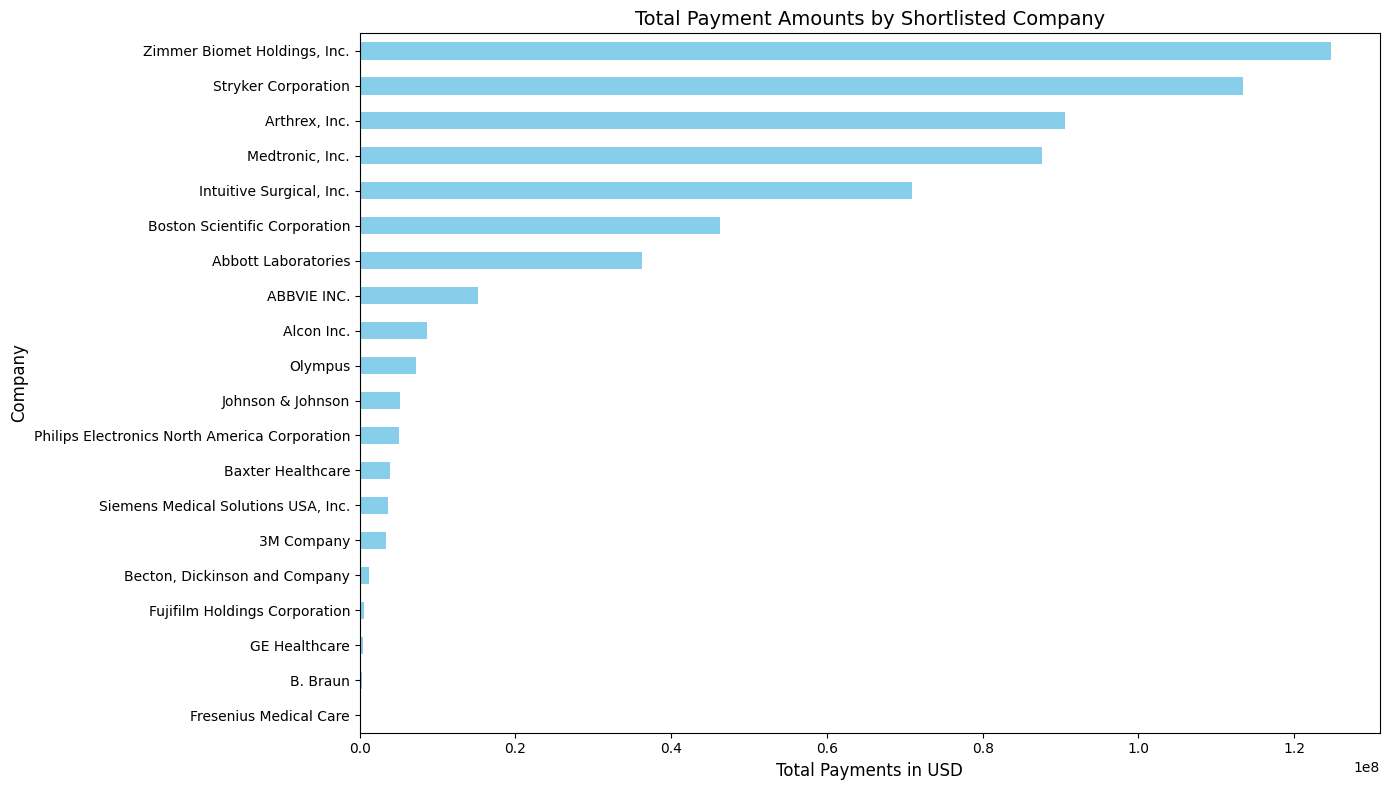

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
# Increase the size of the plot
plt.figure(figsize=(14, 8))  # Adjust width to give more space

# Aggregate total payments by company and sort them in descending order
company_payments = filtered_records.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name')['Total_Amount_of_Payment_USDollars'].sum().sort_values(ascending=False)

# Plot total payments by company in descending order using a horizontal bar plot for better label management
company_payments.plot(kind='barh', color='skyblue')  # Use 'barh' for horizontal bars
plt.title('Total Payment Amounts by Shortlisted Company', fontsize=14)
plt.xlabel('Total Payments in USD', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.yticks(rotation=0, fontsize=10)  # Adjust rotation and font size if necessary
plt.gca().invert_yaxis()  # Invert axis to have the highest value on top
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


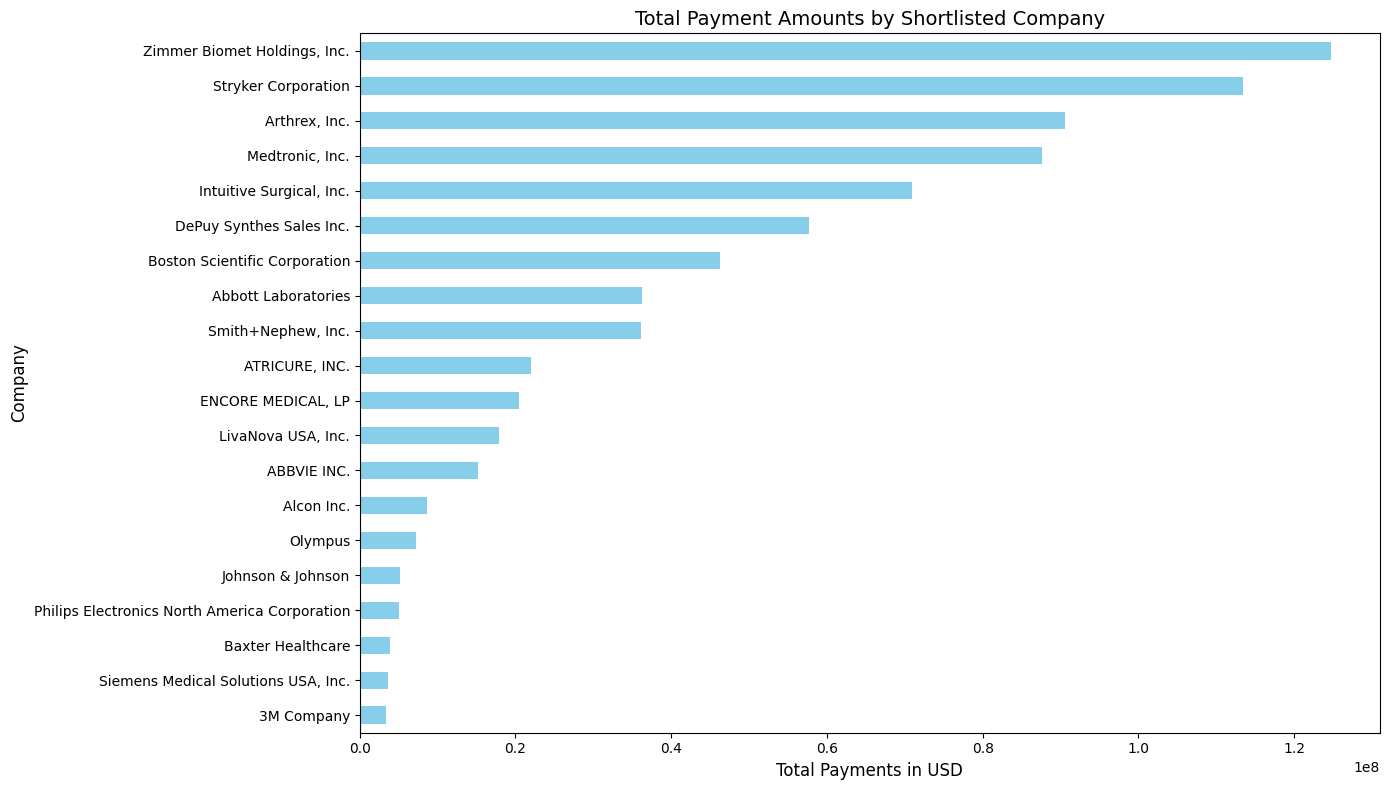

<Figure size 640x480 with 0 Axes>

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))  # Adjust width to give more space

# Aggregate total payments by company and sort them in descending order
company_payments = df.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name')['Total_Amount_of_Payment_USDollars'].sum().sort_values(ascending=False)

# Plot total payments by company in descending order using a horizontal bar plot for better label management
company_payments.plot(kind='barh', color='skyblue')  # Use 'barh' for horizontal bars
plt.title('Total Payment Amounts by Shortlisted Company', fontsize=14)
plt.xlabel('Total Payments in USD', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.yticks(rotation=0, fontsize=10)  # Adjust rotation and font size if necessary
plt.gca().invert_yaxis()  # Invert axis to have the highest value on top
plt.tight_layout()  # Adjust layout to fit everything
plt.show()
plt.savefig('Total Payment Amounts by Shortlisted Company vs Total Payments in USD old', format='png', dpi=300)

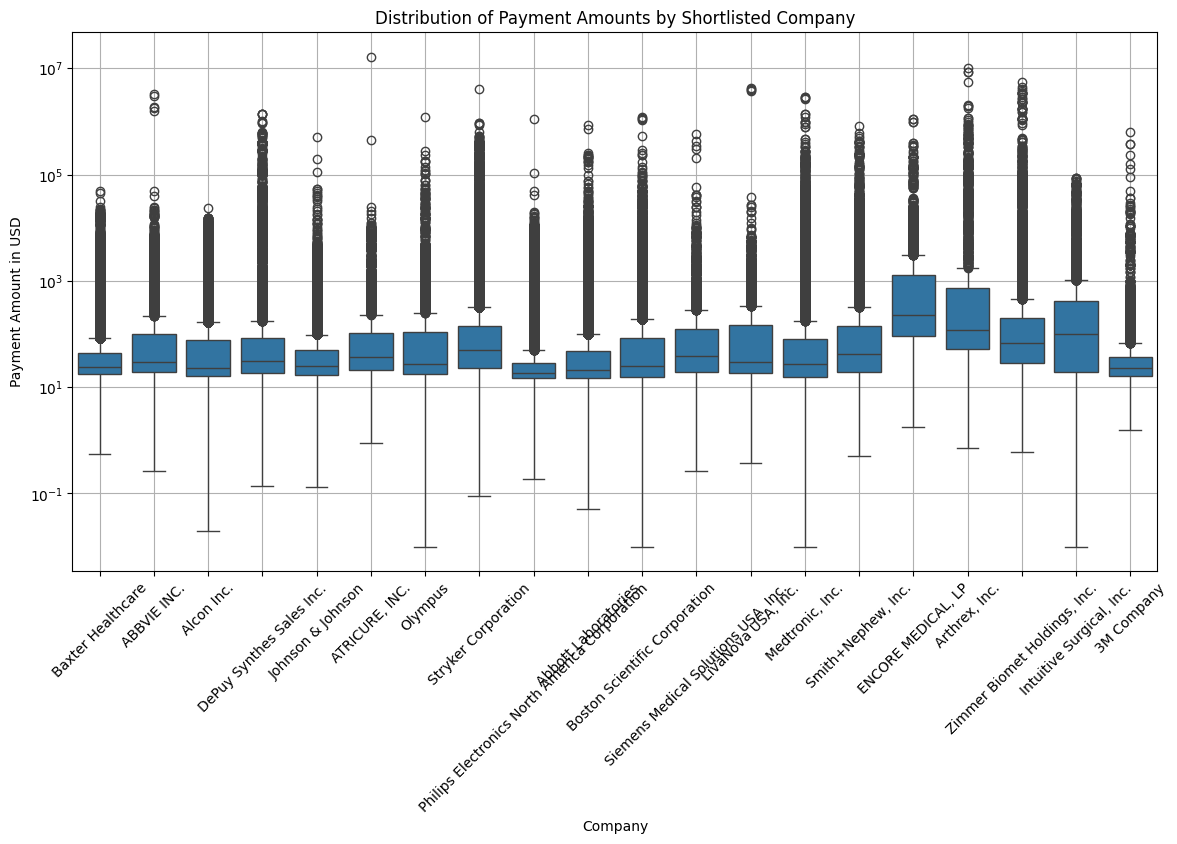

In [61]:
import seaborn as sns
plt.figure(figsize=(14, 7))
sns.boxplot(
    x='Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
    y='Total_Amount_of_Payment_USDollars',
    data=df
)
plt.title('Distribution of Payment Amounts by Shortlisted Company')
plt.ylabel('Payment Amount in USD')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.yscale('log')  # Use logarithmic scale to better display outliers
plt.grid(True)
plt.show()


In [62]:
# Summarize data by company and coverage indicator
coverage_summary = df.groupby(['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Covered_or_Noncovered_Indicator_1']).size().unstack(fill_value=0)

# Summarize data by company and product type
product_type_summary = df.groupby(['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1']).size().unstack(fill_value=0)

# Summarize data by company and therapeutic area
therapeutic_summary = df.groupby(['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Product_Category_or_Therapeutic_Area_1']).size().unstack(fill_value=0)

print(coverage_summary)
print(product_type_summary)
print(therapeutic_summary)

Covered_or_Noncovered_Indicator_1                   Covered  Non-Covered
Submitting_Applicable_Manufacturer_or_Applicabl...                      
3M Company                                             9482           24
ABBVIE INC.                                           22533            0
ATRICURE, INC.                                        24961            0
Abbott Laboratories                                  309711         1292
Alcon Inc.                                            76260         4547
Arthrex, Inc.                                          1929          223
Baxter Healthcare                                     22747         1710
Boston Scientific Corporation                        150408        77132
DePuy Synthes Sales Inc.                              28460          160
ENCORE MEDICAL, LP                                     4480           25
Intuitive Surgical, Inc.                             102492            0
Johnson & Johnson                                  

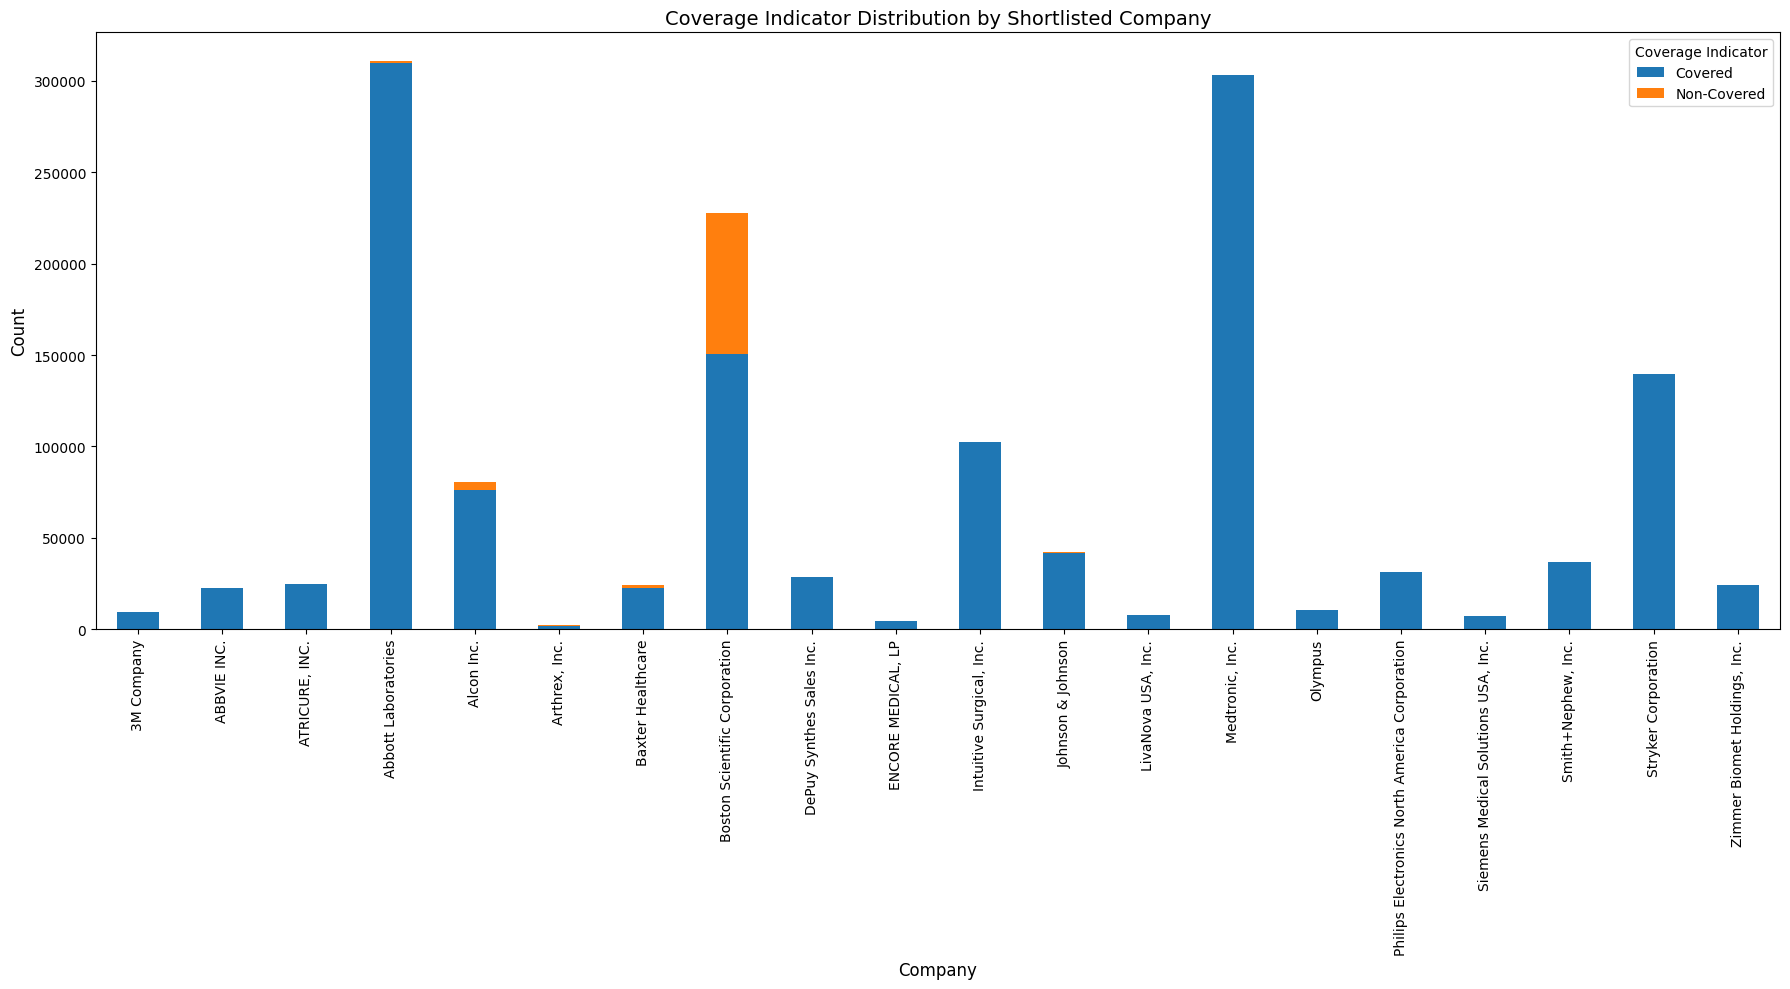

In [63]:
# Visualize coverage indicator distribution with adjusted label alignment and rotation
coverage_summary.plot(kind='bar', figsize=(18, 10), stacked=True)
plt.title('Coverage Indicator Distribution by Shortlisted Company', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Company', fontsize=12)
plt.xticks(rotation=90, ha='center')  # Rotate labels to 90 degrees and adjust alignment to center
plt.yticks(fontsize=10)
plt.legend(title='Coverage Indicator', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

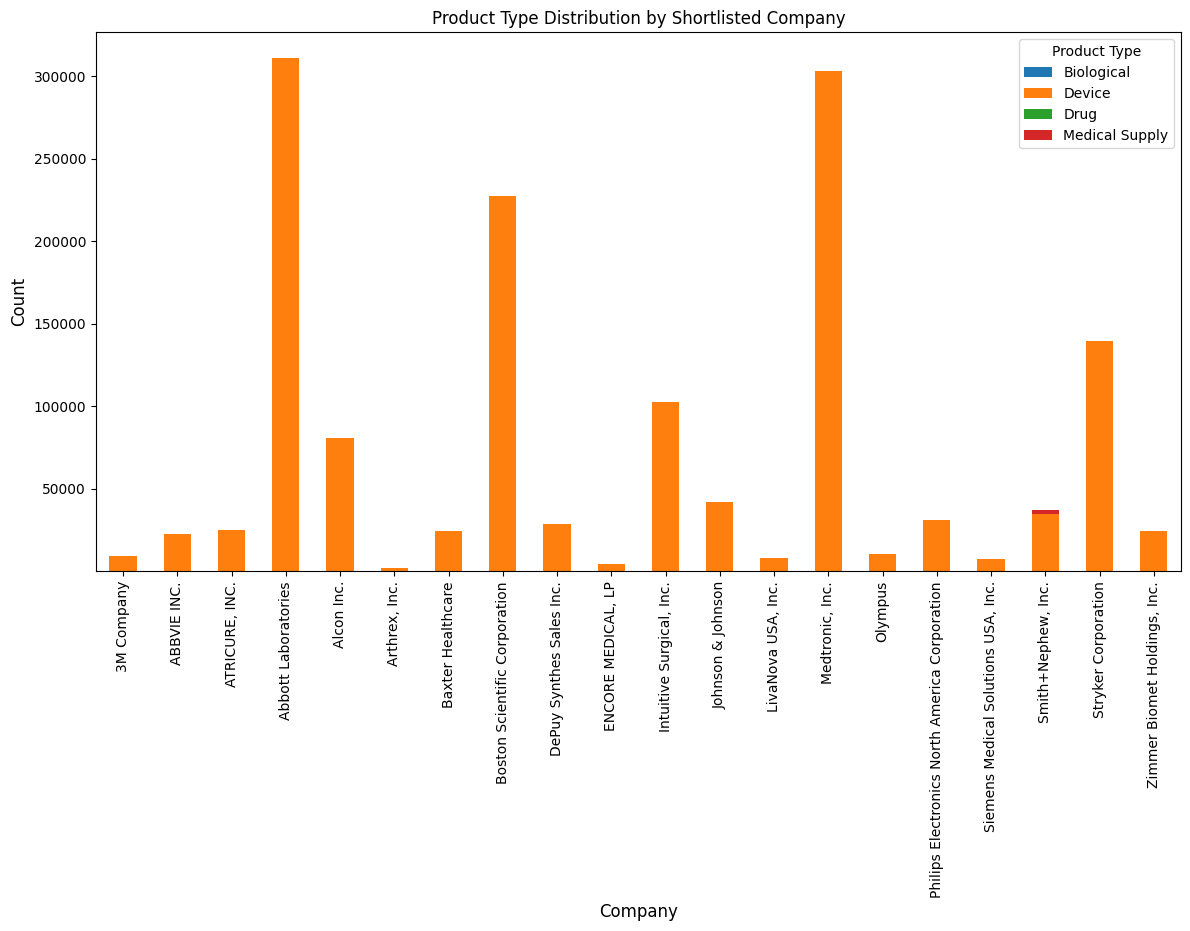

In [64]:
# Visualize product type distribution
product_type_summary.plot(kind='bar', figsize=(14, 7), stacked=True)
plt.title('Product Type Distribution by Shortlisted Company')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Company', fontsize=12)
plt.xticks(rotation=90, ha='center')  # Rotate labels to 90 degrees and adjust alignment to center
plt.yticks(fontsize=10)
plt.legend(title='Product Type')
plt.show()

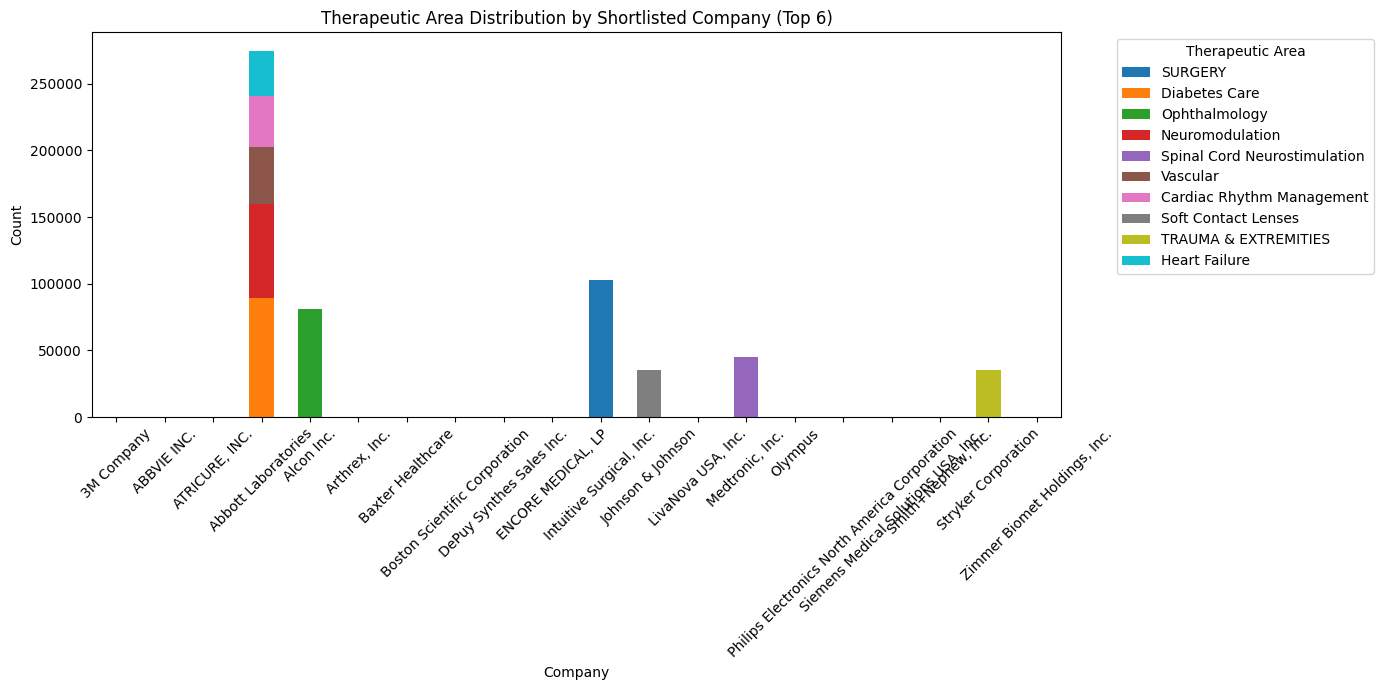

In [65]:
# Visualize therapeutic area distribution (Top 10 most common for readability)
top_therapeutic_areas = therapeutic_summary.sum(axis=0).nlargest(10).index
filtered_therapeutic_summary = therapeutic_summary[top_therapeutic_areas]
filtered_therapeutic_summary.plot(kind='bar', figsize=(14, 7), stacked=True)
plt.title('Therapeutic Area Distribution by Shortlisted Company (Top 6)')
plt.ylabel('Count')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.legend(title='Therapeutic Area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [66]:
# Convert the payment amount column to float if it's not already
df['Total_Amount_of_Payment_USDollars'] = pd.to_numeric(df['Total_Amount_of_Payment_USDollars'], errors='coerce')
total_payments_by_company = df.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name')['Total_Amount_of_Payment_USDollars'].sum()

# Sort the results in descending order and get the top 10
top_10_companies_by_payment = total_payments_by_company.sort_values(ascending=False).head(20)

# Print the top 10 companies and their total payment amounts
print(top_10_companies_by_payment)


Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name
Zimmer Biomet Holdings, Inc.                     1.247992e+08
Stryker Corporation                              1.134212e+08
Arthrex, Inc.                                    9.051638e+07
Medtronic, Inc.                                  8.761146e+07
Intuitive Surgical, Inc.                         7.096773e+07
DePuy Synthes Sales Inc.                         5.774663e+07
Boston Scientific Corporation                    4.622861e+07
Abbott Laboratories                              3.621437e+07
Smith+Nephew, Inc.                               3.612286e+07
ATRICURE, INC.                                   2.201579e+07
ENCORE MEDICAL, LP                               2.045211e+07
LivaNova USA, Inc.                               1.788977e+07
ABBVIE INC.                                      1.515422e+07
Alcon Inc.                                       8.687618e+06
Olympus                                          7.227953e+06
Johnson & Jo

In [67]:
# Convert the payment amount column to float if it's not already
df['Total_Amount_of_Payment_USDollars'] = pd.to_numeric(df['Total_Amount_of_Payment_USDollars'], errors='coerce')

# Aggregate total payments by company
total_payments_by_company = df.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name')['Total_Amount_of_Payment_USDollars'].sum()

# Sort the results in descending order and get the top 20
top_20_companies_by_payment = total_payments_by_company.sort_values(ascending=False).head(20)

# Format the amounts to be more readable and print the top 10 companies and their total payment amounts
formatted_payments = top_20_companies_by_payment.apply(lambda x: f"${x:,.2f}")
print(formatted_payments)

Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name
Zimmer Biomet Holdings, Inc.                     $124,799,169.81
Stryker Corporation                              $113,421,182.93
Arthrex, Inc.                                     $90,516,383.79
Medtronic, Inc.                                   $87,611,457.99
Intuitive Surgical, Inc.                          $70,967,731.75
DePuy Synthes Sales Inc.                          $57,746,631.74
Boston Scientific Corporation                     $46,228,609.45
Abbott Laboratories                               $36,214,365.10
Smith+Nephew, Inc.                                $36,122,860.31
ATRICURE, INC.                                    $22,015,791.89
ENCORE MEDICAL, LP                                $20,452,109.48
LivaNova USA, Inc.                                $17,889,766.34
ABBVIE INC.                                       $15,154,218.94
Alcon Inc.                                         $8,687,618.34
Olympus                         

In [68]:
# Convert payment amounts to numeric, handle errors if present
df['Total_Amount_of_Payment_USDollars'] = pd.to_numeric(df['Total_Amount_of_Payment_USDollars'], errors='coerce')

# Aggregate payments by company and product type
payments_by_company_product = df.groupby(
    ['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1']
)['Total_Amount_of_Payment_USDollars'].sum().unstack(fill_value=0)

# Sum payments by company to identify the top 20
total_payments_by_company = payments_by_company_product.sum(axis=1)
top_20_companies = total_payments_by_company.sort_values(ascending=False).head(20).index

# Filter the detailed breakdown for these top 20 companies
top_20_detailed = payments_by_company_product.loc[top_20_companies]

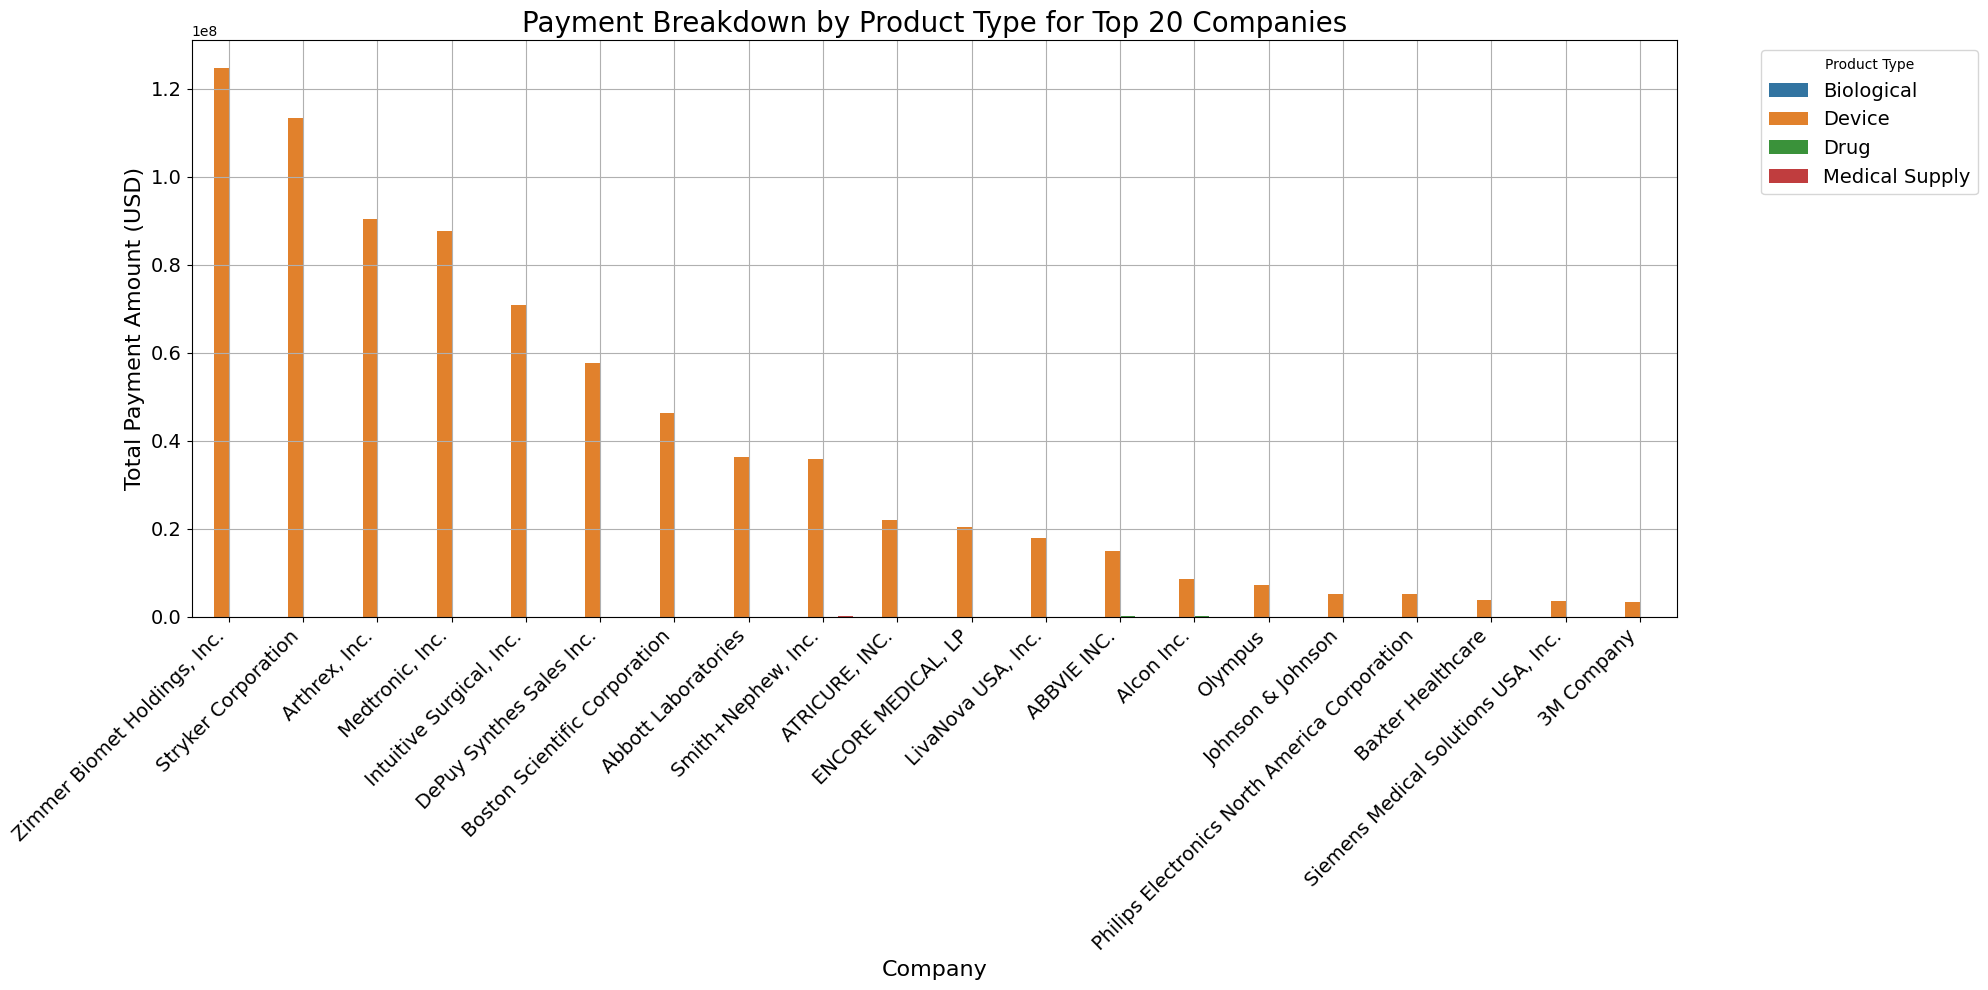

In [69]:
plt.figure(figsize=(20, 10))  # Large figure size to handle more companies
sns.barplot(
    data=top_20_detailed.reset_index().melt(id_vars='Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', value_vars=top_20_detailed.columns, var_name='Product Type', value_name='Total_Amount_of_Payment_USDollars'),
    x='Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
    y='Total_Amount_of_Payment_USDollars',
    hue='Product Type'
)

plt.title('Payment Breakdown by Product Type for Top 20 Companies', fontsize=20)
plt.xlabel('Company', fontsize=16)
plt.ylabel('Total Payment Amount (USD)', fontsize=16)
plt.xticks(rotation=45, fontsize=14, ha='right')  # Rotate for better visibility
plt.yticks(fontsize=14)
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
top_20_detailed

Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Biological,Device,Drug,Medical Supply
Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,,,,
"Zimmer Biomet Holdings, Inc.",0.00,1.247992e+08,0.00,0.00
Stryker Corporation,0.00,1.134189e+08,0.00,2296.56
"Arthrex, Inc.",43261.37,9.047312e+07,0.00,0.00
"Medtronic, Inc.",0.00,8.761146e+07,0.00,0.00
"Intuitive Surgical, Inc.",0.00,7.096773e+07,0.00,0.00
DePuy Synthes Sales Inc.,0.00,5.774663e+07,0.00,0.00
Boston Scientific Corporation,0.00,4.622861e+07,0.00,0.00
Abbott Laboratories,0.00,3.621437e+07,0.00,0.00
"Smith+Nephew, Inc.",0.00,3.592994e+07,4752.16,188169.41


In [71]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [82]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load model and tokenizer
model_path = "malcolm/REA_GenderIdentification_v1"
tokenizer = AutoTokenizer.from_pretrained(model_path, use_auth_token=token)
model = AutoModelForSequenceClassification.from_pretrained(model_path, use_auth_token=token)

# Set device for M1 chip (use MPS - Metal Performance Shaders)
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on device: {device}")
model.to(device)

# Load data
data_path = "FinalDataFrame.csv"
data = pd.read_csv(data_path)

# Check if column exists
if 'Covered_Recipient_First_Name' not in data.columns:
    raise ValueError("The column 'Covered_Recipient_First_Name' is not found in the dataset.")

# Preprocess column
data['Covered_Recipient_First_Name'] = data['Covered_Recipient_First_Name'].fillna("").str.lower()

# Define batch size
batch_size = 32

# Initialize predictions list with None values
predictions = [None] * len(data)

# Iterate through the data in batches
for i in range(0, len(data), batch_size):
    batch_names = data['Covered_Recipient_First_Name'][i:i + batch_size].tolist()
    
    # Keep track of non-empty names and their indices
    non_empty_indices = [j for j, name in enumerate(batch_names) if name.strip() != ""]
    non_empty_names = [batch_names[j] for j in non_empty_indices]
    
    # If there are no valid names in this batch, continue
    if len(non_empty_names) == 0:
        continue

    # Tokenize and move to device
    inputs = tokenizer(non_empty_names, return_tensors="pt", padding=True, truncation=True).to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted classes (1 for M, 0 for F)
    logits = outputs.logits
    batch_predictions = torch.argmax(logits, dim=1).cpu().tolist()

    # Assign predictions back to the correct positions in the main predictions list
    for idx, prediction in zip(non_empty_indices, batch_predictions):
        predictions[i + idx] = "F" if prediction == 1 else "M"

# Add predictions to the DataFrame
data['Gender'] = predictions

# Save the output to a new CSV file
output_path = "FinalDataFrame_with_Gender.csv"
data.to_csv(output_path, index=False)

print(f"Gender predictions saved to {output_path}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/models/auto/tokenization_auto.py:711: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/models/auto/auto_factory.py:472: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


Running on device: mps


/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_57677/2564058183.py:18: DtypeWarning: Columns (2,7,22,23,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


Gender predictions saved to FinalDataFrame_with_Gender.csv


In [73]:
# Read data
data_A = pd.read_csv('US1.csv')
data_A = data_A.dropna(subset=['FirstName', 'Gender'])

data_B = pd.read_csv('data.csv')
data_B = data_B.dropna(subset=['Name', 'Gender'])

# Convert FirstName, Name, and Gender columns to lowercase
data_A['FirstName'] = data_A['FirstName'].str.lower()

data_B['Name'] = data_B['Name'].str.lower()

# Create a dictionary mapping from names to gender
name_to_gender = dict(zip(data_A['FirstName'], data_A['Gender']))

# Update name-to-gender mapping using data from data_B
for name, gender in zip(data_B['Name'], data_B['Gender']):
    name_to_gender[name] = gender

# Gender prediction function
def predict_gender(name):
    return name_to_gender.get(name.lower(), 'Unknown')  # Convert the input name to lowercase

# Read the third dataset and process
data_C = pd.read_csv('FinalDataFrame.csv')
data_C = data_C.dropna(subset=['Covered_Recipient_First_Name'])

# Convert Covered_Recipient_First_Name to lowercase and predict gender
data_C['Gender'] = data_C['Covered_Recipient_First_Name'].str.lower().apply(predict_gender)

# Calculate unmatched rate
total_count = len(data_C)
unmatched_count = len(data_C[data_C['Gender'] == 'Unknown'])
unmatched_rate = unmatched_count / total_count
print("Unrecognized rate:", unmatched_rate)

# Save the results as a new CSV file, including the Gender column
data_C.to_csv('FinalDataFrame_with_Gender.csv', index=False)

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_57677/3126287335.py:25: DtypeWarning: Columns (2,7,22,23,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data_C = pd.read_csv('FinalDataFrame.csv')


Unrecognized rate: 0.01682811589825462


In [74]:
# Load model and tokenizer
model_path = "malcolm/REA_GenderIdentification_v1"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on device: {device}")
model.to(device)

# Read data
data_A = pd.read_csv('US1.csv')
data_A = data_A.dropna(subset=['FirstName', 'Gender'])

data_B = pd.read_csv('data.csv')
data_B = data_B.dropna(subset=['Name', 'Gender'])

# Convert FirstName, Name, and Gender columns to lowercase
data_A['FirstName'] = data_A['FirstName'].str.lower()
data_B['Name'] = data_B['Name'].str.lower()

# Create a dictionary mapping from names to gender
name_to_gender = dict(zip(data_A['FirstName'], data_A['Gender']))

# Update name-to-gender mapping using data from data_B
for name, gender in zip(data_B['Name'], data_B['Gender']):
    name_to_gender[name] = gender

# Gender prediction function
def predict_gender(name):
    return name_to_gender.get(name.lower(), 'Unknown')  # Convert the input name to lowercase

# Read the third dataset and process
data_C = pd.read_csv('FinalDataFrame.csv')
data_C = data_C.dropna(subset=['Covered_Recipient_First_Name'])

# Convert Covered_Recipient_First_Name to lowercase and predict gender
data_C['Covered_Recipient_First_Name'] = data_C['Covered_Recipient_First_Name'].fillna("").str.lower()
data_C['Gender'] = data_C['Covered_Recipient_First_Name'].apply(predict_gender)

# Find unmatched rows
unmatched_rows = data_C[data_C['Gender'] == 'Unknown'].copy()

# If there are unmatched rows, use the model to predict gender
if len(unmatched_rows) > 0:
    # Define batch size
    batch_size = 32
    
    # Initialize list for predictions
    unmatched_predictions = [None] * len(unmatched_rows)
    
    # Batch prediction using the model
    for i in range(0, len(unmatched_rows), batch_size):
        batch_names = unmatched_rows['Covered_Recipient_First_Name'][i:i+batch_size].tolist()
        
        # Filter out empty names and get valid indices
        non_empty_indices = [j for j, name in enumerate(batch_names) if name.strip() != ""]
        non_empty_names = [batch_names[j] for j in non_empty_indices]
        
        # Skip if no valid names in batch
        if len(non_empty_names) == 0:
            continue
        
        # Tokenize names and move to device
        inputs = tokenizer(non_empty_names, return_tensors="pt", padding=True, truncation=True).to(device)
        
        # Model prediction
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Get prediction results (1 represents M, 0 represents F)
        logits = outputs.logits
        batch_predictions = torch.argmax(logits, dim=1).cpu().tolist()
        
        # Save predictions back to list
        for idx, prediction in zip(non_empty_indices, batch_predictions):
            unmatched_predictions[i + idx] = "F" if prediction == 1 else "M"
    
    # Update the Gender column in unmatched rows
    unmatched_rows['Gender'] = unmatched_predictions
    
    # Update the original data with the newly predicted genders
    data_C.update(unmatched_rows)

# Calculate unmatched rate
total_count = len(data_C)
unmatched_count = len(data_C[data_C['Gender'] == 'Unknown'])
unmatched_rate = unmatched_count / total_count
print("Unrecognized rate:", unmatched_rate)

# Save the results as a new CSV file, including the Gender column
output_path = "FinalDataFrame_with_Gender_Predictions.csv"
data_C.to_csv(output_path, index=False)

print(f"Gender predictions saved to {output_path}")

Running on device: cpu


/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_57677/593473676.py:34: DtypeWarning: Columns (2,7,22,23,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data_C = pd.read_csv('FinalDataFrame.csv')


Unrecognized rate: 0.0
Gender predictions saved to FinalDataFrame_with_Gender_Predictions.csv


In [75]:
# Load the CSV file with low_memory=False to avoid the mixed types warning
newDf = pd.read_csv('FinalDataFrame_with_Gender_Predictions.csv', low_memory=False)
pd.set_option('display.width', 1000)  # Adjust the width as needed
pd.set_option('display.max_columns', 10)  # Set max columns to display in a row

# Display the first 10 records
print(newDf.head(10))

        Covered_Recipient_Type Covered_Recipient_First_Name Covered_Recipient_Middle_Name Covered_Recipient_Last_Name Recipient_City  ... Product_Category_or_Therapeutic_Area_4 Covered_or_Noncovered_Indicator_5 Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5 Product_Category_or_Therapeutic_Area_5 Gender
0  Covered Recipient Physician                          ben                           NaN                         RAD         FRESNO  ...                                    NaN                               NaN                                                NaN                                           NaN      F
1  Covered Recipient Physician                         sana                           NaN                     QURESHI         POMONA  ...                                    NaN                               NaN                                                NaN                                           NaN      M
2  Covered Recipient Physician                      tau

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_57677/2063885628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_payments_by_gender, x='Gender', y='Total_Amount_of_Payment_USDollars', palette='pastel')


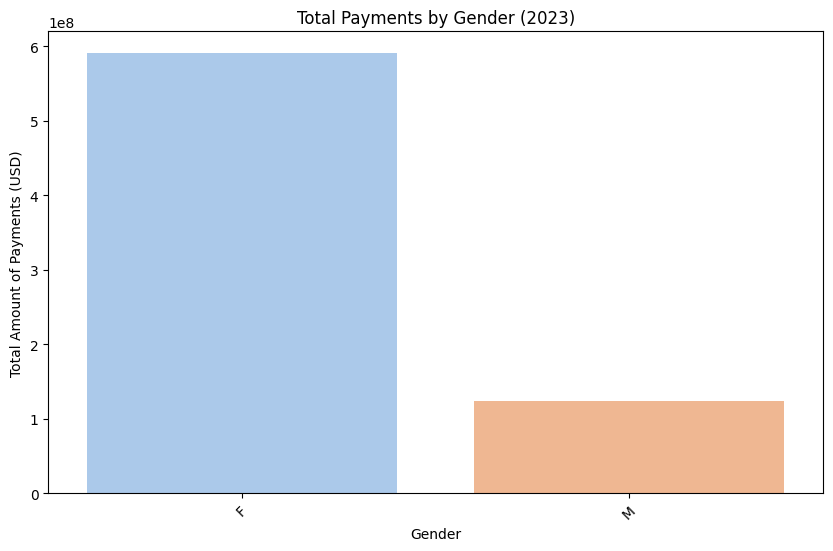

In [76]:
# 1. Total Payments by Gender
total_payments_by_gender = newDf.groupby('Gender')['Total_Amount_of_Payment_USDollars'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=total_payments_by_gender, x='Gender', y='Total_Amount_of_Payment_USDollars', palette='pastel')
plt.title('Total Payments by Gender (2023)')
plt.xlabel('Gender')
plt.ylabel('Total Amount of Payments (USD)')
plt.xticks(rotation=45)
plt.show()

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_57677/566962422.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_payments_by_gender, x='Gender', y='Total_Amount_of_Payment_USDollars', palette='pastel')


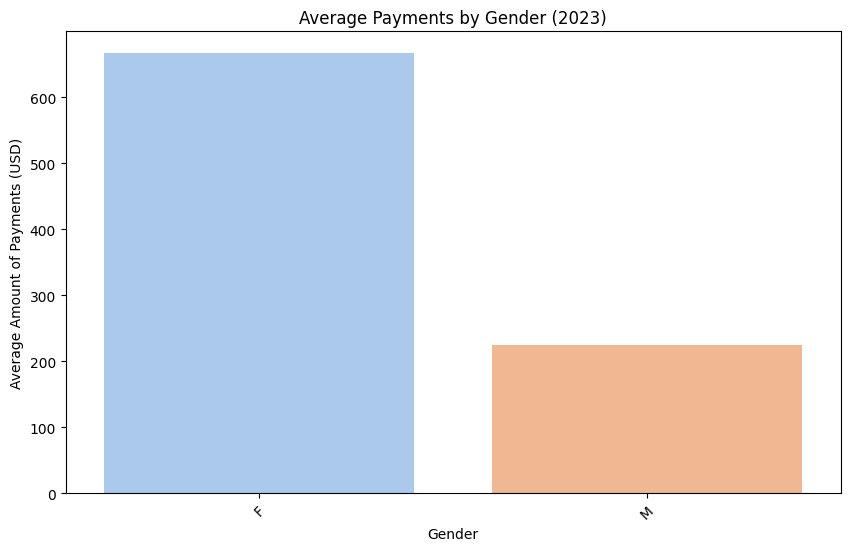

In [77]:
# 2. Average Payments by Gender
average_payments_by_gender = newDf.groupby('Gender')['Total_Amount_of_Payment_USDollars'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=average_payments_by_gender, x='Gender', y='Total_Amount_of_Payment_USDollars', palette='pastel')
plt.title('Average Payments by Gender (2023)')
plt.xlabel('Gender')
plt.ylabel('Average Amount of Payments (USD)')
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x800 with 0 Axes>

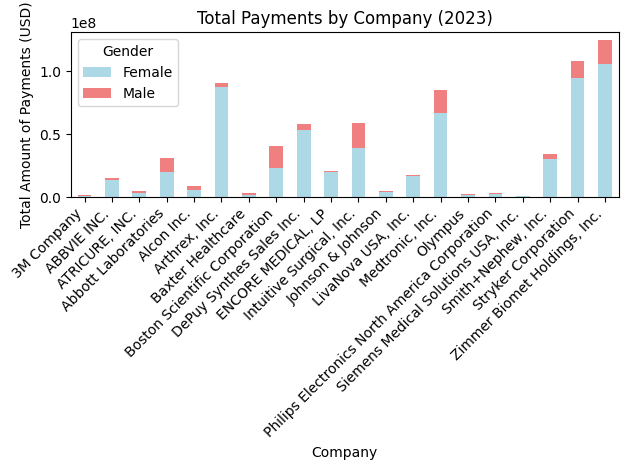

In [78]:
company_gender_payments = newDf.groupby(
    ['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Gender']
)['Total_Amount_of_Payment_USDollars'].sum().unstack().fillna(0)
# Plotting Total Payments by Company for Males and Females
plt.figure(figsize=(15, 8))
company_gender_payments.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])
plt.title('Total Payments by Company (2023)')
plt.xlabel('Company')
plt.ylabel('Total Amount of Payments (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

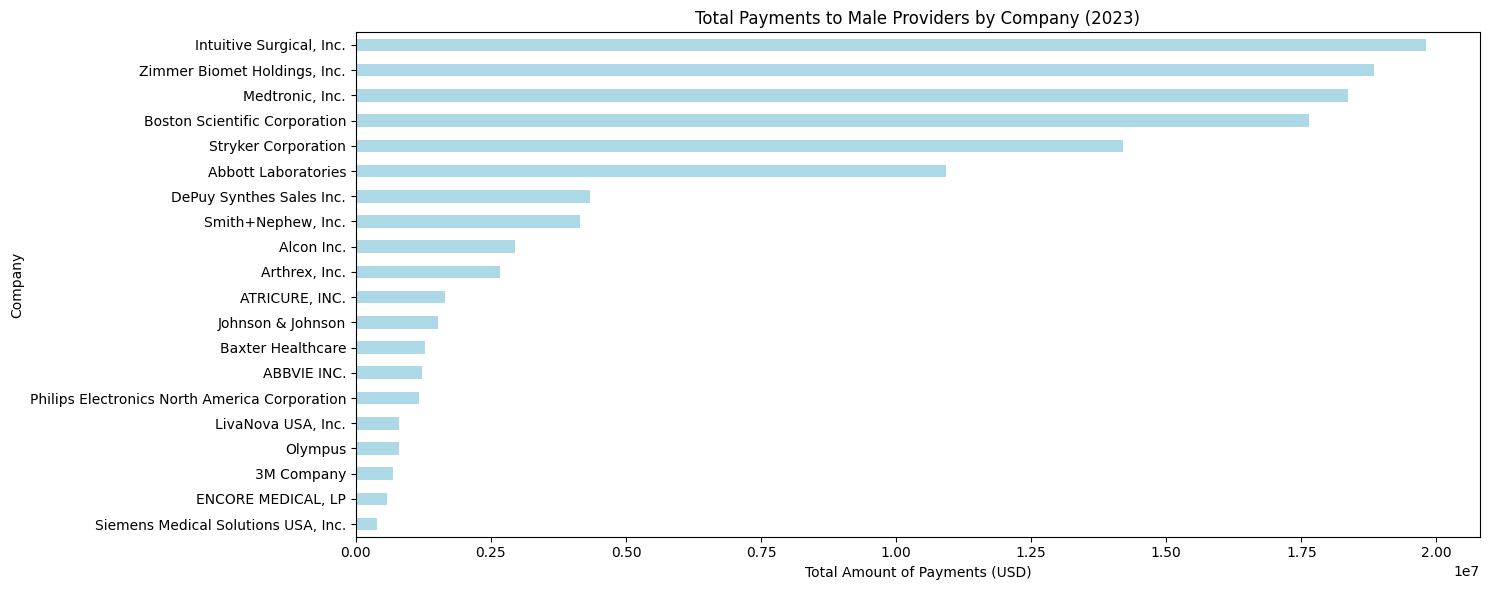

In [79]:
# 1. Total Payments for Males
male_payments = company_gender_payments['M']
plt.figure(figsize=(15, 6))
male_payments.sort_values().plot(kind='barh', color='lightblue')
plt.title('Total Payments to Male Providers by Company (2023)')
plt.xlabel('Total Amount of Payments (USD)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()



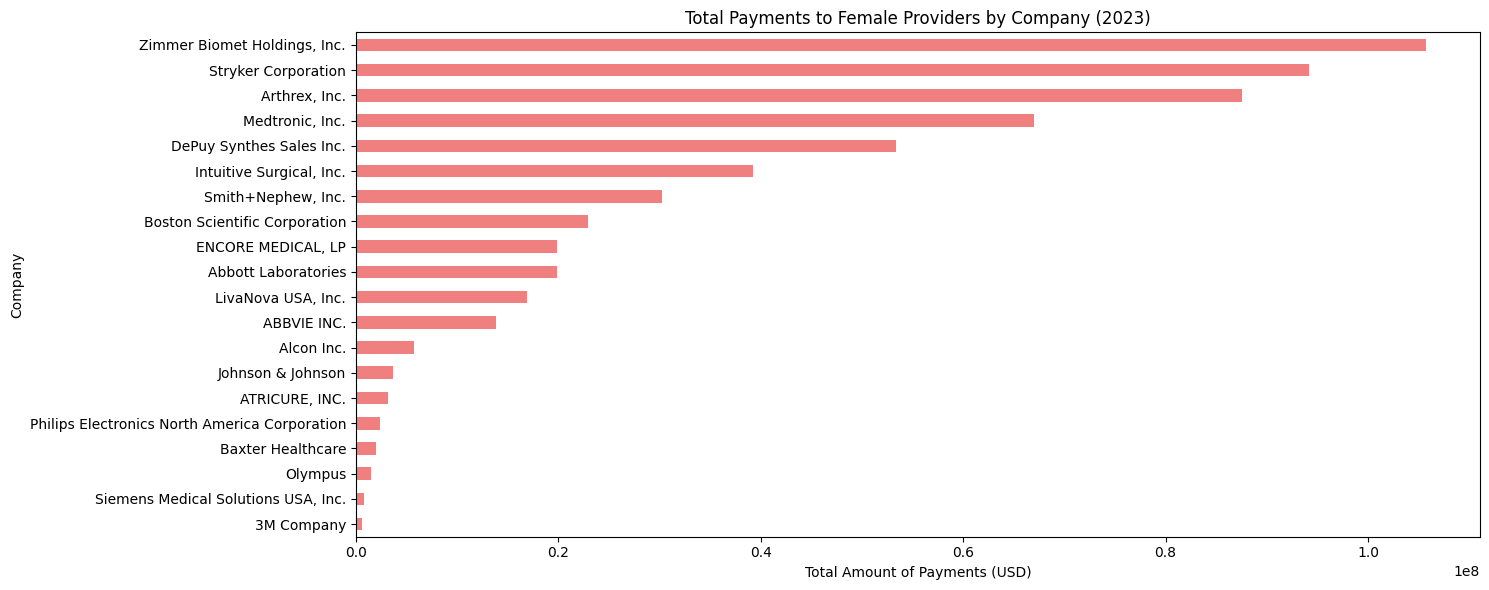

In [80]:
# 2. Total Payments for Females
female_payments = company_gender_payments['F']
plt.figure(figsize=(15, 6))
female_payments.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Total Payments to Female Providers by Company (2023)')
plt.xlabel('Total Amount of Payments (USD)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

In [81]:
gender_counts = newDf['Gender'].value_counts()

print(gender_counts)

Gender
F    886508
M    550373
Name: count, dtype: int64
